#Email Spam classifier

This project aims to classify whether a email is spam or not based on email content.

##Data Ingestion

The dataset has around 80k examples and 2 columns
1. ```Text``` -  The email content
2. ```label``` - 1 and 0. 1 means spam and 0 mean not spam

In [ ]:
#!/bin/bash
!kaggle datasets download purusinghvi/email-spam-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/purusinghvi/email-spam-classification-dataset
License(s): MIT
 67% 29.0M/43.0M [00:00<00:00, 58.2MB/s]
100% 43.0M/43.0M [00:00<00:00, 82.2MB/s]


In [ ]:
!unzip email-spam-classification-dataset

Archive:  email-spam-classification-dataset.zip
  inflating: combined_data.csv       


In [2]:
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt

'e:\\Github repositories\\end-to-end-email-spam-classifier'

In [21]:
df = pd.read_csv('artifacts/data_ingestion/data.csv').sample(10000)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
# check Duplicates
df.duplicated().sum()

0

In [ ]:
# Check for null values
df.isnull().sum()

,0
label,0
text,0


##Basic Visualization

<Axes: ylabel='count'>

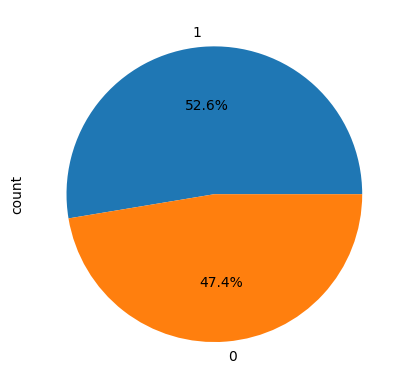

In [ ]:
df['label'].value_counts().plot.pie(autopct='%1.1f%%')

## Basic Text Preprocessing

1. lower casing
2. Special character removal
3. tokenization
4. stopword removal
5. stemming

In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

def preprocess(text):

    text = text.lower() # lowercasing
    text = re.sub(r'https?://\S+|www\.\S+|[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', ' ', text) # remove links
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text) # remove special chars
    text = nltk.word_tokenize(text) #tokenization

    st_word = set(stopwords.words('english')) #stop word removal
    text = [i for i in text if i not in st_word]

    ps = PorterStemmer()
    text = [ps.stem(i) for i in text]

    return ' '.join(text)

df['text'] = df['text'].apply(preprocess)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\palma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\palma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\palma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df

,label,text
0,1,ounc feather bowl hummingbird opec moment alab...
1,1,wulvob get medirc onlin qnb ikud viagra escape...
2,0,comput connect cnn com wednesday escapenumb ma...
3,1,univers degre obtain prosper futur money earn ...
4,0,thank answer guy know check rsync manual would...
...,...,...
83443,0,hi given date get last date month data form yy...
83444,1,order softwar cd download site immedi delphi 7...
83445,1,dear valu member canadianpharmaci provid wide ...
83446,0,subscrib chang profil contact us long term esc...


## EDA

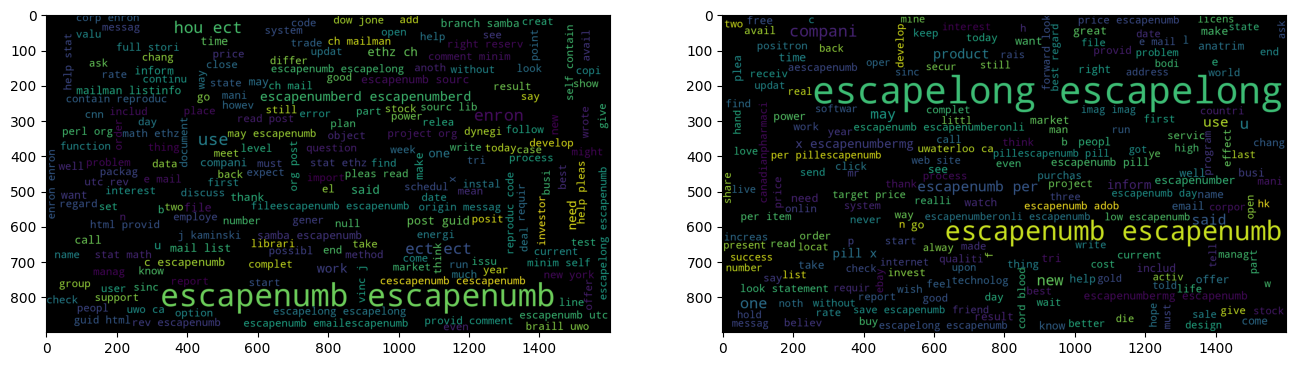

In [ ]:
from wordcloud import WordCloud


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))

cloud = WordCloud(height=900, width=1600)
ax[0].imshow(cloud.generate(df[df['label'] == 0]['text'].str.cat(sep=' ')))
ax[1].imshow(cloud.generate(df[df['label'] == 1]['text'].str.cat(sep=' ')))

## Model Building

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

In [22]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.05, random_state=42)
# vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 1))

# vectorizer.fit(x_train)

# x_train = vectorizer.transform(x_train).toarray()
# x_test = vectorizer.transform(x_test).toarray()

In [ ]:
# models = {
#     'SVC': SVC(kernel='linear'),
#     'GaussianNB': GaussianNB(),
#     'BernoulliNB': BernoulliNB(),
#     'MultinomialNB': MultinomialNB(),
#     'LogisticRegression': LogisticRegression(),
#     'DecisionTreeClassifier': DecisionTreeClassifier(),
#     'RandomForestClassifier': RandomForestClassifier(),
#     'AdaBoostClassifier': AdaBoostClassifier(),
#     'ExtraTreesClassifier': ExtraTreesClassifier(),
#     'GradientBoostingClassifier': GradientBoostingClassifier()
# }

# scores = {'model': [], 'accuracy': [], 'precision': []}

# for name, model in models.items():
#     model.fit(x_train, y_train)
#     y_pred = model.predict(x_test)

#     scores['model'].append(name)
#     scores['accuracy'].append(accuracy_score(y_test, y_pred))
#     scores['precision'].append(precision_score(y_test, y_pred))

# scores = pd.DataFrame(scores).sort_values(by='accuracy', ascending=False)
# scores

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,model,accuracy,precision
3,MultinomialNB,0.97,0.978723
4,LogisticRegression,0.97,0.959184
0,SVC,0.95,0.938776
8,ExtraTreesClassifier,0.93,0.936170
6,RandomForestClassifier,0.92,0.900000
1,GaussianNB,0.90,0.975000
9,GradientBoostingClassifier,0.89,0.849057
7,AdaBoostClassifier,0.88,0.860000
5,DecisionTreeClassifier,0.84,0.820000
2,BernoulliNB,0.78,0.703125


In [ ]:
from sklearn.ensemble import BaggingClassifier

# bagging_classifier = BaggingClassifier(estimator=MultinomialNB(), n_estimators=10, bootstrap=True, oob_score=True)
# bagging_classifier.fit(x_train, y_train)
# y_pred = bagging_classifier.predict(x_test)
# acc = accuracy_score(y_test, y_pred)
# ps = precision_score(y_test, y_pred)

# (acc, ps)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:875: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:881: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(0.97, 0.9787234042553191)

In [ ]:
# voting_classifier = VotingClassifier([
#     ('MultinomialNB', MultinomialNB()),
#     ('LogisticRegression', LogisticRegression())
# ])

# voting_classifier.fit(x_train, y_train)
# y_pred = voting_classifier.predict(x_test)
# acc = accuracy_score(y_test, y_pred)
# ps = precision_score(y_test, y_pred)

# (acc, ps)

## Converting eveything into a pipeline

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

class Preprocessing(BaseEstimator, TransformerMixin):
    def __init_(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X: pd.Series) -> pd.DataFrame:

        preprocessed_text = X.apply(self.preprocess)
        return pd.DataFrame(preprocessed_text, columns=['text'])

    def preprocess(self, text):

        text = text.lower() # lowercasing
        text = re.sub(r'https?://\S+|www\.\S+|[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', ' ', text) # remove links
        text = re.sub(r'[^a-zA-Z0-9]', ' ', text) # remove special chars
        text = nltk.word_tokenize(text) #tokenization

        st_word = set(stopwords.words('english')) #stop word removal
        text = [i for i in text if i not in st_word]

        ps = PorterStemmer()
        text = [ps.stem(i) for i in text]

        return ' '.join(text)

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


coluumn_transformer = ColumnTransformer([
    ('Vectorize', TfidfVectorizer(max_features=5000), 'text')
])

voting_classifier = VotingClassifier([
    ('MultinomialNB', MultinomialNB()),
    ('LogisticRegression', LogisticRegression())
])


final_pipeline = Pipeline(steps=[
    ('Text Preprocessin', Preprocessing()),
    ('Vectorizer', coluumn_transformer),
    ('Model', voting_classifier)
])

In [24]:
final_pipeline.fit(x_train, y_train)
y_pred = final_pipeline.predict(x_test)
acc = accuracy_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)

(acc, ps)

(0.96, np.float64(0.9788732394366197))

In [25]:
# Save scores in json file
import json

with open('metrics.json', 'w') as f:
    json.dump({'accuracy': acc, 'precision': ps}, f)

In [ ]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(final_pipeline, f)